ALYA RESTI SARASWATI
(5026211057)


# SVR

## Import Data set dan Library

In [ ]:
#Melakukan Import Data set
from google.colab import files
uploaded = files.upload()

Saving DailyTemps.csv to DailyTemps (1).csv


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Load Data set

Melakukan load dataset dengan membaca file csv yang telah diupload, kemudia dataset tersebut dijadikan data frame dengan nama "temps"

In [ ]:
# Load the dataset
temps = pd.read_csv('DailyTemps.csv')
temps.head(10)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
5,1/6/2014,22.0,39.0,31.0,658,1759
6,1/7/2014,28.0,45.0,37.0,658,1759
7,1/8/2014,30.0,41.0,36.0,659,1800
8,1/9/2014,29.0,42.0,36.0,659,1801
9,1/10/2014,30.0,47.0,39.0,659,1801


In [ ]:
#Menampilkan informasi dari dataset
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


Memilih berapa banyak baris data yang akan dijadikan sample

In [ ]:
# Keep a certain number of samples
num_samples_to_keep = 450 # 100 - 1000 (pilih rentang 100 - 1000)
temps = temps.head(num_samples_to_keep)

Melakukan drop kolom dan juga rename nama kolom, yang kemudia hal tersebut disimpan di data frame baru yaitu "temps2"

In [ ]:
# Dropping columns '['MinTemp', 'MaxTemp', 'Sunrise', 'Sunset']'
temps2 = temps.drop(columns=['MinTemp','MaxTemp','Sunrise','Sunset'])

# Renaming columns '['DATE', 'AvgTemp']'
new_column_names = {'DATE': 'Tanggal', 'AvgTemp': 'Rata-Rata'}
temps2 = temps2.rename(columns=new_column_names)

#cara lain buat rename
#temps2.rename(columns={'AvgTemp': 'Rata-Rata', 'DATE': 'Tanggal'}, inplace=True) kode lain bisa langsung kayak gini, penggunaan inplace untuk mengubah secara langsung datasetnya, klu tidak pakai, maka  datasetnya akan dicopy
#temps2.columns = ['Tanggal','Rataan']

In [ ]:
temps2.head()

,Tanggal,Rata-Rata
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


Dikarenakan terdapat data yang kosong, maka dilakukan pengisian data

In [ ]:
#Mengisi baris data yang kosong (NaN)
temps2 = temps2.fillna(method='ffill')

In [ ]:
temps2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tanggal    450 non-null    object 
 1   Rata-Rata  450 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.2+ KB


Mengubah kolom "Tanggal" menjadi format datetime

In [ ]:
# Converting 'DATE' column to datetime format
temps2['Tanggal'] = pd.to_datetime(temps2['Tanggal'], format='%m/%d/%Y')
temps2.head()

,Tanggal,Rata-Rata
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


In [ ]:
temps2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Tanggal    450 non-null    datetime64[ns]
 1   Rata-Rata  450 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.2 KB


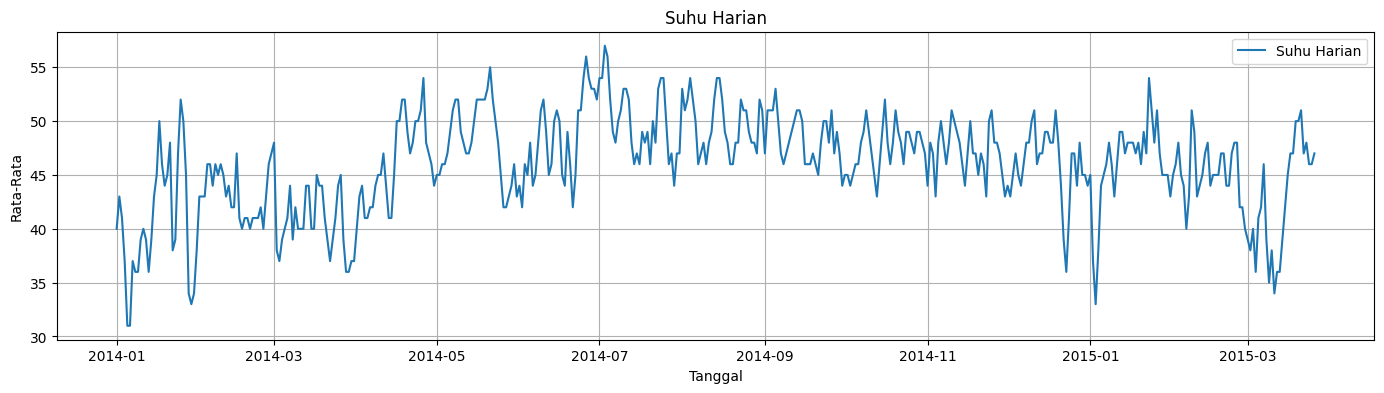

In [ ]:
# Plot time series data
plt.figure(figsize=(17, 4))
plt.plot(temps2['Tanggal'], temps2['Rata-Rata'], label='Suhu Harian')
plt.grid()
plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata')
plt.legend()
plt.title('Suhu Harian')
plt.show()


## Pembuatan model dan visualisasi

Mengacak urutan indeks pada DataFrame "temps2". Proses pengacakan ini dapat berguna saat ingin membagi data menjadi subset pelatihan dan pengujian dengan urutan yang acak, sehingga model yang dibangun tidak terpengaruh oleh pola urutan data yang mungkin ada dalam dataset.

In [ ]:
# Shuffle the dataset
shuffled_indices = shuffle(temps2.index, random_state=3)



Membagi dataset temp2 menjadi dua komponen: variabel independen (X) dan variabel dependen (y). Penggunaan iloc memastikan pemilihan data berdasarkan posisi indeks, bukan label indeks, sehingga memastikan konsistensi dalam pemisahan data.

In [ ]:
# Splitting features and target variable
X, y = temps2[['Tanggal']].iloc[shuffled_indices], temps2['Rata-Rata'].iloc[shuffled_indices]



In [ ]:
# Membagi data set menajdi 80-20 (untuk training dan testing)
temps2_train = int(0.8 * len(y))
X_train, y_train = X.iloc[:temps2_train], y.iloc[:temps2_train]
X_test, y_test = X.iloc[temps2_train:], y.iloc[temps2_train:]

In [ ]:
# Display results
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)

         Length
X_train     360
y_train     360
X_test       90
y_test       90


Membuat model SVR dengan fitting dan prediksi. Penggunaan kernel linear menghasilkan pola garis lurus vertikal pada grafik Actual vs Predicted, menunjukkan model yang terlalu sederhana atau kurang sesuai untuk data. Untuk mengatasi hal ini, mencoba menggunakan kernel rbf sebagai alternatif.

In [ ]:
# Create SVR model
regressor= SVR(kernel='rbf', C=1.0, epsilon=0.1)



Mengubah nilai input menjadi bentuk matriks 2D diperlukan agar sesuai dengan persyaratan format yang diterima oleh model Support Vector Regression (SVR). Biasanya, model SVR mengharapkan input dalam bentuk matriks dengan dua dimensi

In [ ]:
# Fit the SVR model
regressor.fit(X_train.values.reshape(-1, 1), y_train)
# Predict
y_pred = regressor.predict(X_test['Tanggal'].values.reshape(-1, 1))

Mengevaluasi performa model regresi SVR dengan menggunakan beberapa metrik evaluasi, yaitu Mean Squared Error (MSE), Mean Absolute Error (MAE), dan Root Mean Squared Error (RMSE)

In [ ]:
# Evaluate the model
print("MSE = ", round(sm.mean_squared_error(y_test, y_pred), 2))
print("MAE = ", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)).round(2))

MSE =  10.57
MAE =  2.5
RMSE =  3.25


Membuat scatter plot untuk memvisualisasikan hubungan antara nilai aktual (y_test) dan prediksi model (y_pred). Pola titik yang mengikuti garis diagonal menunjukkan prediksi yang sangat baik.

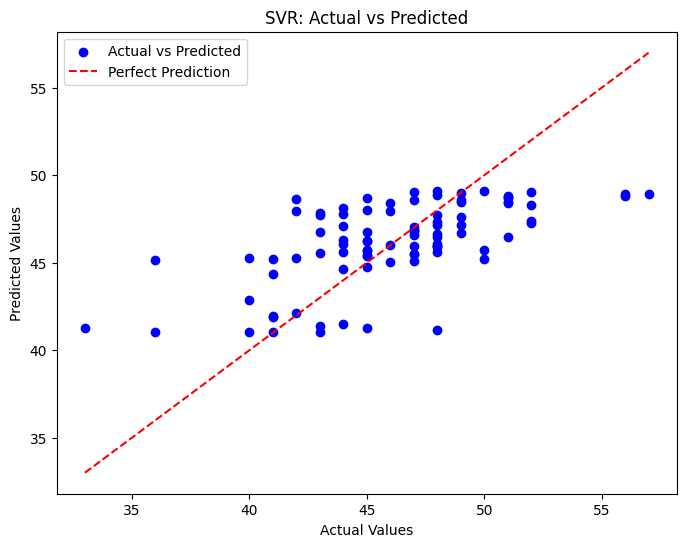

In [ ]:
# Plot the Actual vs Predicted
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Dalam plot yang disajikan di atas, terdapat sebaran titik-titik yang mencerminkan perbandingan antara data aktual dan data yang diprediksi. Secara visual, hasil yang bagus akan menunjukkan titik-titik data yang terkumpul relatif rapat di sepanjang garis diagonal tersebut. Hal ini menunjukkan bahwa prediksi model hampir mendekati nilai aktual dengan tingkat kesalahan yang kecil. Namun, pada plot di atas terdapat sebaran titik yang acak dan tidak mengikuti garis diagonal, kemungkinan besar menandakan bahwa model Support Vector Regression (SVR) belum mampu memprediksi data uji dengan akurasi yang memadai.

Selain itu, penggunaan parameter bawaan SVR yang tidak diubah dapat menyebabkan overfitting, yang dapat terlihat dari sebaran titik yang acak. Oleh karena itu, dapat disimpulkan bahwa model SVR tidak memberikan hasil optimal dalam memprediksi dataset 'DailyTemps'. Perlu dilakukan penyesuaian parameter atau mungkin eksplorasi model lain untuk mencapai performa yang lebih baik.

# ARIMA

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
!pip install pmdarima
import pmdarima as pm
import itertools
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset
arima = pd.read_csv('DailyTemps.csv')
arima.head(10)



,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
5,1/6/2014,22.0,39.0,31.0,658,1759
6,1/7/2014,28.0,45.0,37.0,658,1759
7,1/8/2014,30.0,41.0,36.0,659,1800
8,1/9/2014,29.0,42.0,36.0,659,1801
9,1/10/2014,30.0,47.0,39.0,659,1801


In [ ]:
# Keep a certain number of samples
num_samples_to_keep = 500 # 100 - 1000 (pilih antara 100 hingga 1000)
arima = arima.head(num_samples_to_keep)

In [ ]:
# Assuming arima is the DataFrame
#arima.rename(columns={'DATE': 'Tanggal', 'MinTemp': 'MinSuhu', 'MaxTemp': 'MaxSuhu', 'AvgTemp': 'Rata-Rata', 'Sunrise': 'Terbit', 'Sunset': 'Tenggelam'}, inplace=True)

new_column_name = {'DATE': 'Tanggal', 'MinTemp': 'MinSuhu', 'MaxTemp': 'MaxSuhu', 'AvgTemp': 'Rata-Rata', 'Sunrise': 'Terbit', 'Sunset': 'Tenggelam'}
arima = arima.rename(columns=new_column_name)

# Print DataFrame untuk memeriksa hasil rename
print(arima.head())


    Tanggal  MinSuhu  MaxSuhu  Rata-Rata  Terbit  Tenggelam
0  1/1/2014     33.0     46.0       40.0     657       1756
1  1/2/2014     35.0     50.0       43.0     657       1756
2  1/3/2014     36.0     45.0       41.0     657       1757
3  1/4/2014     32.0     41.0       37.0     658       1757
4  1/5/2014     24.0     38.0       31.0     658       1758


In [ ]:
# Ubah kolom 'Tanggal' menjadi tipe data datetime
arima['Tanggal'] = pd.to_datetime(arima['Tanggal'], format='%m/%d/%Y')
arima = arima.set_index('Tanggal')
arima.head()

,MinSuhu,MaxSuhu,Rata-Rata,Terbit,Tenggelam
Tanggal,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [ ]:
# fill the nan values by upper row value
arima= arima.fillna(method='ffill')

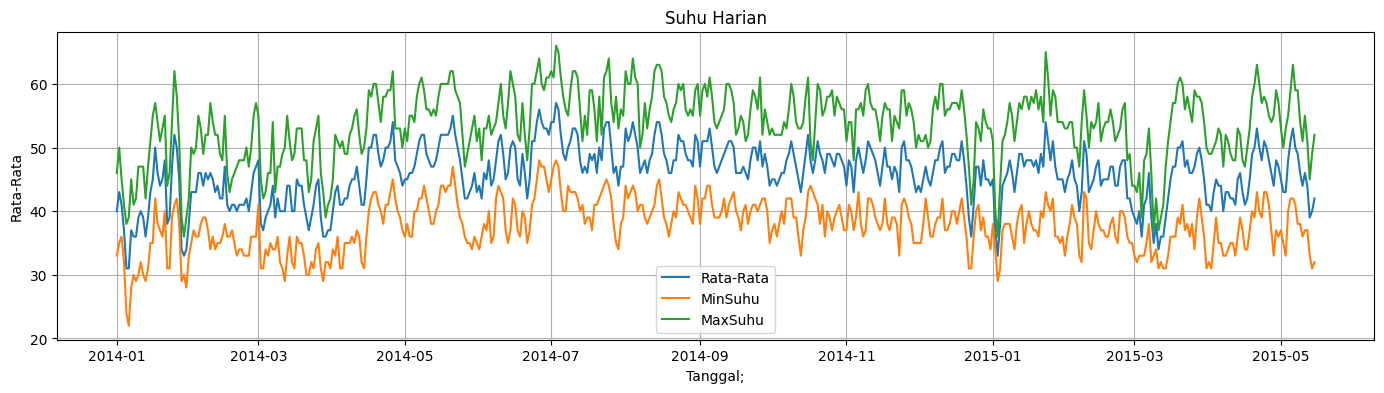

In [ ]:
# Plot the time series data
plt.figure(figsize=(17, 4))
plt.plot(arima.index, arima['Rata-Rata'], label='Rata-Rata')
plt.plot(arima.index, arima['MinSuhu'], label='MinSuhu')
plt.plot(arima.index, arima['MaxSuhu'], label='MaxSuhu')
plt.grid()
plt.xlabel('Tanggal;')
plt.ylabel('Rata-Rata')
plt.legend()
plt.title('Suhu Harian')
plt.show()

## Check Stasionarity

Bertujuan untuk memberikan pemahaman apakah seri waktu 'AvgTemp' bersifat stasioner atau tidak berdasarkan hasil uji ADF.

In [ ]:
# JANGAN DIGANTI
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, Data is non-stationary ")

In [ ]:
print(adfuller(arima['Rata-Rata']))

(-5.096224952821867, 1.4266107198546545e-05, 5, 494, {'1%': -3.4436568932270095, '5%': -2.8674084917497074, '10%': -2.5698956806372832}, 2248.490380492516)


In [ ]:
# hasil test ADF
adf_test(arima['Rata-Rata'])

ADF Statistics: -5.096224952821867
p- value: 1.4266107198546545e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


Karena milai p-value sudah kurang dari 0.05 berarti data sudah stasioner, sehingga tidak perlu dilakukan differencing

## ACF dan PACF Plot

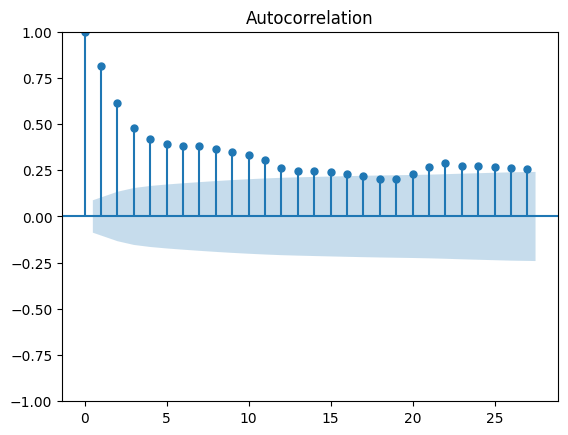

In [ ]:
# Plot ACF
acf = plot_acf(arima['Rata-Rata'].dropna())


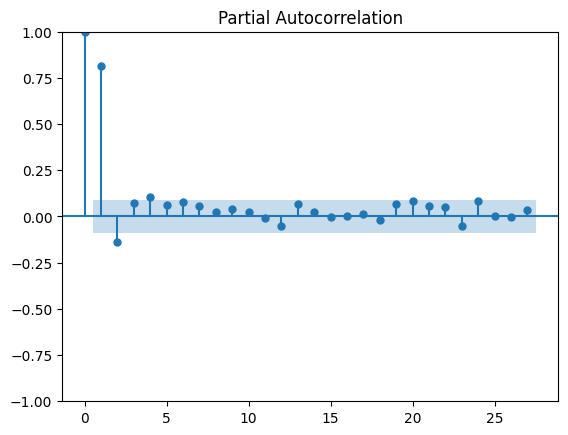

In [ ]:
# Plot PACF
acf = plot_pacf(arima['Rata-Rata'].dropna())



In [ ]:
# Split Dataset (Mengambil 80-20)
train_len = 400
train_data = arima[0:train_len]
test_data = arima[train_len:500]


In [ ]:
# Inisialisasi tanggal awal dan akhir prediksi
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]


In [ ]:
train_data

,MinSuhu,MaxSuhu,Rata-Rata,Terbit,Tenggelam
Tanggal,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2015-01-31,33.0,53.0,43.0,658,1814
2015-02-01,36.0,53.0,45.0,657,1815
2015-02-02,38.0,54.0,46.0,657,1816


## Manual Parima

Inisialisasi model ARIMA dilakukan berdasarkan analisis plot ACF (Autocorrelation Function) dan PACF (Partial Autocorrelation Function). Dari hasil plot tersebut, terlihat bahwa nilai ACF untuk lag terjauh adalah 1, dan nilai PACF untuk lag terjauh juga adalah 1. Oleh karena itu, untuk menentukan urutan model ARIMA, dipilih nilai order (1,0,1).

In [ ]:
# Inisialisasi Model ARIMA
model_Arima = ARIMA(train_data['Rata-Rata'],order=(1,0,1)) # (order= pacf(p), difference(d), acf(q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Train model ARIMA
model_Arima_fit=model_Arima.fit()


In [ ]:
# Summary Model ARIMA
print(model_Arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Rata-Rata   No. Observations:                  400
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -939.518
Date:                Mon, 04 Dec 2023   AIC                           1887.036
Time:                        14:49:36   BIC                           1903.002
Sample:                    01-01-2014   HQIC                          1893.359
                         - 02-04-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2137      0.632     73.080      0.000      44.974      47.453
ar.L1          0.7563      0.041     18.319      0.000       0.675       0.837
ma.L1          0.1953      0.056      3.476      0.0

In [ ]:
# Lakukan Prediksi
prediksi = model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)

In [ ]:
# Simpan Prediksi di dataFrame
test_data['Predicted_ARIMA'] = prediksi

<ipython-input-298-333d387b42b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = prediksi


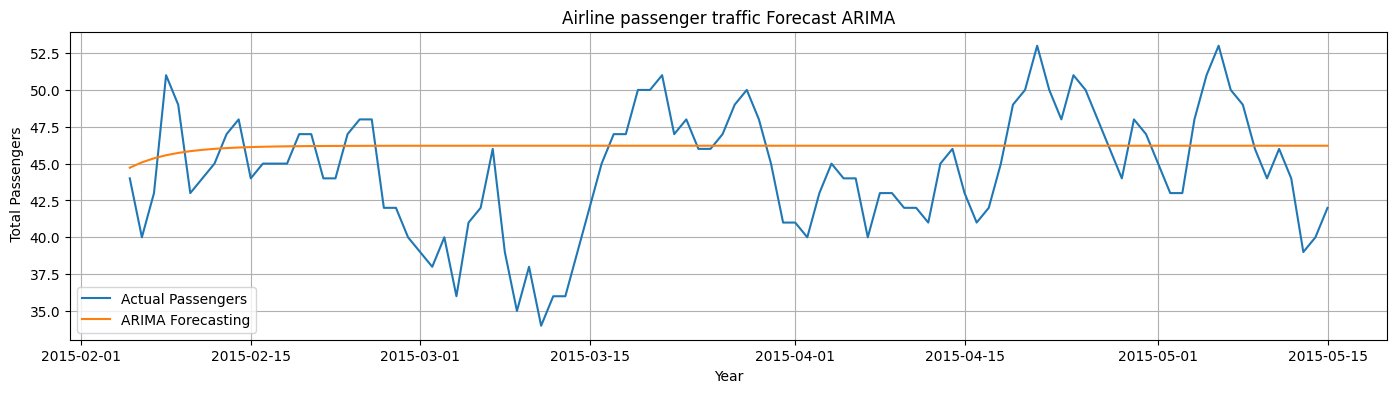

In [ ]:
# Plot Perbandingan ARIMA dan Actual Data
plt.figure(figsize=(17, 4))
plt.plot(test_data['Rata-Rata'], label='Actual Passengers')
plt.plot(test_data['Predicted_ARIMA'], label='ARIMA Forecasting')
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic Forecast ARIMA')
plt.show()

## PMD ARIMA (Auto Parameter Arima)

Menentukan best model arima (order)

In [ ]:
model = pm.auto_arima(arima['Rata-Rata'], start_p=1, start_q=1, d=0,
                      suppress_warnings=True,
                      trace=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2358.812, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2914.126, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2368.390, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2567.840, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5252.972, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2360.761, Time=1.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2360.642, Time=0.68 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2438.247, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2360.136, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2355.977, Time=2.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2353.580, Time=3.61 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2350.878, Time=3.20 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2358.832, Time=1.11 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2350.229, Time=2.76 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept

Membuat dan melatih model arima (PMD)

In [ ]:
model_pmd=ARIMA(train_data['Rata-Rata'],order=(4,0,1))
model_pmd_fit=model_pmd.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
#Melakukan Prediksi
pred=model_pmd_fit.predict(start=pred_start_date,end=pred_end_date)
test_data['PMD_Arima'] = pred

<ipython-input-260-a72575a5bff2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['PMD_Arima'] = pred


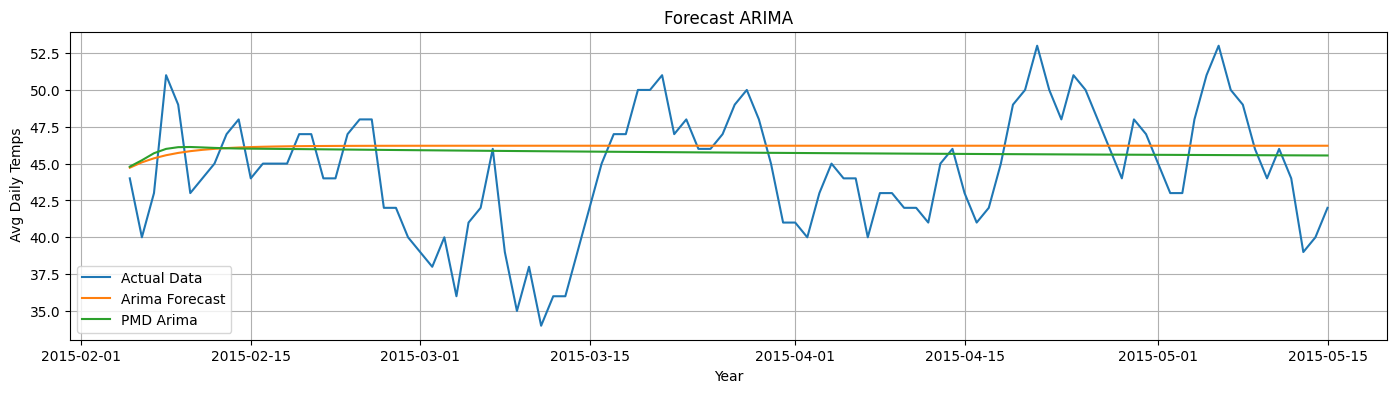

In [ ]:
#Visualisasi
# Plot the time series DMA
plt.figure(figsize=(17, 4))
plt.plot(test_data['Rata-Rata'], label='Actual Data')
plt.plot(test_data['Predicted_ARIMA'], label='Arima Forecast')
plt.plot(test_data['PMD_Arima'], label='PMD Arima')
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Avg Daily Temps")
plt.legend()
plt.title('Forecast ARIMA')
plt.show()

Membandingkan Nilai RMSE dan MAPE  manual ARIMA dan PMD ARIMA

In [ ]:
#Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse_manual = np.sqrt(mean_squared_error(test_data['Rata-Rata'], test_data['Predicted_ARIMA'])).round(2)
mape_manual  = np.round(np.mean(np.abs(test_data['Rata-Rata']- test_data['Predicted_ARIMA'])/test_data['Rata-Rata'])*100,2)

rmse_pmd = np.sqrt(mean_squared_error(test_data['Rata-Rata'], test_data['PMD_Arima'])).round(2)
mape_pmd  = np.round(np.mean(np.abs(test_data['Rata-Rata']- test_data['PMD_Arima'])/test_data['Rata-Rata'])*100,2)

results = pd.DataFrame({'Method':['Manual ARIMA', 'PMD ARIMA'], 'MAPE': [mape_manual,mape_pmd ], 'RMSE': [rmse_manual, rmse_pmd]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Manual ARIMA,4.38,8.27
1,PMD ARIMA,4.27,8.05


Berdasarkan hasil RMSE dan MAPE, dapat dilihat bahwa PMD ARIMA memiliki nilai RMSE dan MAPE yang lebih rendah sehingga dapat disimpulkan bahwa penggunaan Auto Parameter ARIMA menghasilkan model yang lebih baik daripada Manual ARIMA

# Kesimpulan

Berikut adalah rangkuman secara keseluruhan dari hasil forecasting


1. Evaluasi Model SVR: Penyebaran titik-titik pada plot:Penyebaran titik-titik yang acak dan tidak mengikuti garis diagonal. Kemungkinan besar menandakan bahwa model Support Vector Regression (SVR) belum mampu memprediksi data uji dengan akurasi yang memadai. Selain itu, penggunaan parameter bawaan SVR yang tidak diubah dapat menyebabkan overfitting, yang dapat terlihat dari sebaran titik yang acak. Oleh karena itu, dapat disimpulkan bahwa model SVR tidak memberikan hasil optimal dalam memprediksi dataset 'DailyTemps'

2. Evaluasi Model ARIMA: Model ARIMA, baik yang dibuat secara manual maupun dengan menggunakan metode otomatis, menunjukkan karakteristik garis stasioner pada hasil prediksi. Hal ini mengindikasikan bahwa kemungkinan metode ARIMA jjurang cocok untuk dataset 'DailyTemps' .

3. Perbandingan RMSE dan MAPE antara Manual ARIMA dan PMD ARIMA: PMD ARIMA memberikan hasil yang lebih baik dibandingkan dengan Manual ARIMA, yang terindikasi dari nilai yang lebih rendah pada RMSE dan MAPE.

Walaupun RMSE dan MAPE menunjukkan tingkat kesalahan yang rendah dalam prediksi, perlu diperhatikan bahwa plot model menunjukkan adanya ketidakcocokan dengan karakteristik data.. Situasi di mana nilai RMSE dan MAPE rendah tetapi visualisasi forecasting tidak memuaskan mungkin disebabkan oleh model yang kurang efektif dalam menangkap fluktuasi atau outlier